In [7]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import time
from pykrx import stock
# matplotlib 한글 폰트 출력코드

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [8]:
def backtest(code, k, start):
    code = str(code)+".KS"
    df=pd.DataFrame()
    df = pdr.get_data_yahoo(code, start)
    df['변동폭'] = df['High']-df['Low']
    df['목표가'] = df['Open'] + df['변동폭'].shift(1)*k
    df['MA3_yes'] = df.Close.rolling(window=3).mean().shift(1)
    df['내일시가'] = df.Open.shift(-1)
    cond = ( df['High'] > df['목표가'] ) & ( df['목표가'] > df['MA3_yes'] )
    df.loc[cond,'수익률'] = df.loc[cond,'내일시가']/df.loc[cond,'목표가']-0.0032
    return df['수익률']

# 코드불러오기
codes = ['A204320', 'A028050', 'A035150', 'A011210', 'A131390', 'A006360', 'A005070', 'A005380', 'A001510', 'A001140', 'A068270', 'A004020', 'A032560', 'A200130', 'A039490',
 'A079430', 'A000990', 'A011790', 'A210980', 'A002840', 'A035510', 'A029460', 'A086280', 'A005940', 'A006800', 'A020760', 'A011760', 'A069260']
codes = [ code[1:] for code in codes ]

# 수익률 함수 만들기
returns = pd.DataFrame()
for code in codes:
    df = backtest(code,k=0.5,start='2020-01-01')
    returns[code] = df
    time.sleep(0.01)
returns.set_index(returns.index.strftime("%Y-%m-%d"),inplace=True)

# 수익률 결과 정리하기
returns_=pd.DataFrame()
returns_['min']= returns.min(axis=1)
returns_['mean']= returns.mean(axis=1)
returns_['median']= returns.median(axis=1)
returns_['max']= returns.max(axis=1)
returns_['count'] = returns.count(axis=1)
returns_['승패'] = returns_['mean'].map(lambda x:1 if x>1 else 0 )

In [9]:
kospi = pdr.get_data_yahoo( "^KS11",'2020-01-01' )
kospi['어제종가']=kospi.Close.shift(1)
kospi['수익률']=(kospi['Close']/kospi['어제종가'])
kospi.set_index(kospi.index.strftime("%Y-%m-%d"),inplace=True)
# kospi수익률을 returns_함수에 합치기
returns_['코스피']=kospi['수익률']
returns_

,min,mean,median,max,count,승패,코스피
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,0,0,NaN
2020-01-03,NaN,NaN,NaN,NaN,0,0,1.000593
2020-01-06,NaN,NaN,NaN,NaN,0,0,0.990172
2020-01-07,0.965658,0.985990,0.988301,0.996170,7,0,1.009499
2020-01-08,1.047588,1.047588,1.047588,1.047588,1,1,0.988863
...,...,...,...,...,...,...,...
2022-12-05,0.968312,0.981525,0.983338,0.994998,7,0,0.993834
2022-12-06,0.973791,0.973791,0.973791,0.973791,1,0,0.989187
2022-12-07,0.977932,0.997769,0.999759,1.011875,5,0,0.995675


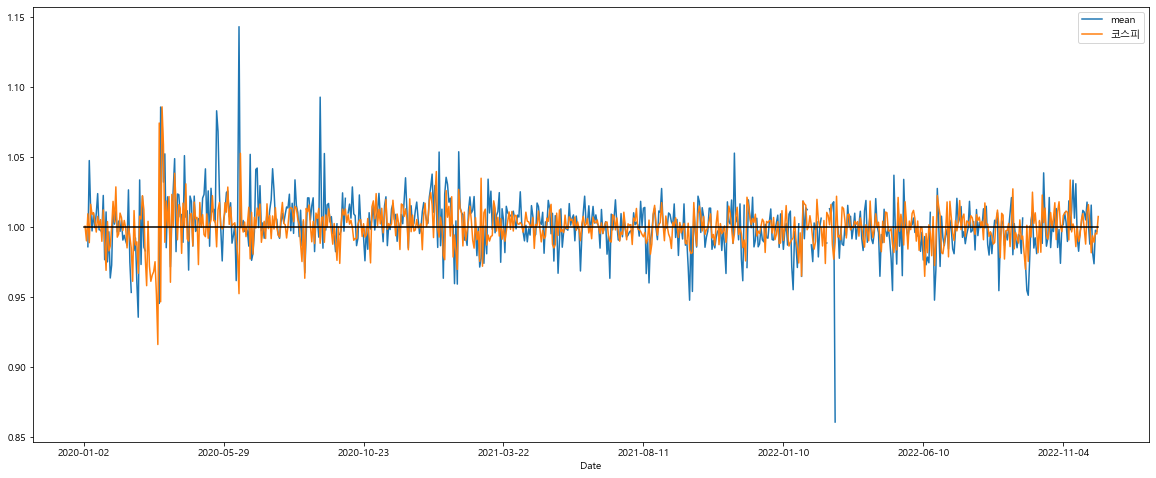

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
returns_[['mean','코스피']].plot(ax=ax)
ax.plot(np.ones(returns_.shape[0]),color='black')